In [101]:
import torch
from torch import nn

torch.__version__

'2.3.1+cu121'

In [102]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Get Data

In [103]:
!wget https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip

--2024-07-30 15:37:41--  https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/pizza_steak_sushi.zip [following]
--2024-07-30 15:37:41--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/pizza_steak_sushi.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15737296 (15M) [application/zip]
Saving to: ‘pizza_steak_sushi.zip.1’

pizza_steak_sushi.z 100%[===================>]  15.01M  91.6MB/s    in 0.2s    

2024-07-30 15:37:42 (91.6 MB/s) - ‘pizza_st

In [104]:
import zipfile
zip_ref = zipfile.ZipFile("/content/pizza_steak_sushi.zip","r")
zip_ref.extractall('/content/data/pizza_steak_sushi')
zip_ref.close()

### 2. Data Preparation and Exploration

In [105]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [106]:
walk_through_dir("/content/data/pizza_steak_sushi")

There are 2 directories and 0 images in '/content/data/pizza_steak_sushi'.
There are 3 directories and 0 images in '/content/data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in '/content/data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in '/content/data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in '/content/data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in '/content/data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in '/content/data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in '/content/data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in '/content/data/pizza_steak_sushi/train/sushi'.


In [107]:
from pathlib import Path

image_path = Path("/content/data/pizza_steak_sushi")

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir , test_dir

(PosixPath('/content/data/pizza_steak_sushi/train'),
 PosixPath('/content/data/pizza_steak_sushi/test'))

### Visualizing and images

1. Get all of the image path
2. Pick a random image path
3. Get the image class names
4. Open images with PIL
5. Show the image and print metadata

In [108]:
image_path

PosixPath('/content/data/pizza_steak_sushi')

Random image path : /content/data/pizza_steak_sushi/train/steak/2287136.jpg
Image class : steak
Image Height : 512
Image Width  : 512


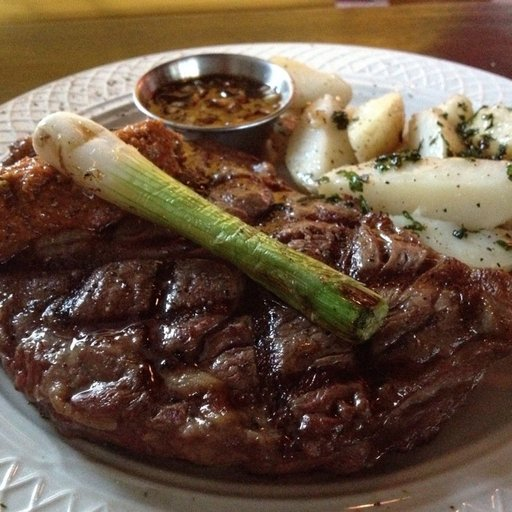

In [109]:
import random
from PIL import Image

# Get image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

# pick random image path
random_image_path = random.choice(image_path_list)

# Get image class names
random_image_path

# Get image class name
image_class = random_image_path.parent.stem

# image open
img = Image.open(random_image_path)

# print metadata
print(f"Random image path : {random_image_path}")
print(f"Image class : {image_class}")
print(f"Image Height : {img.height}")
print(f"Image Width  : {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

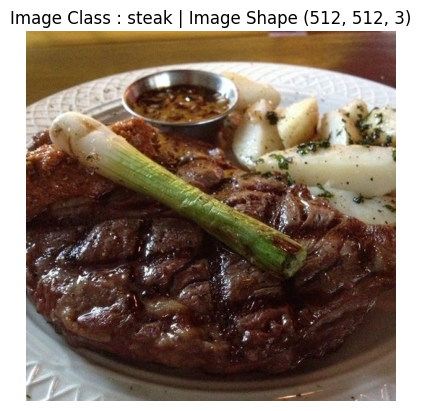

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Turn image into array
img_as_array = np.asarray(img)

plt.imshow(img_as_array)
plt.title(f"Image Class : {image_class} | Image Shape {img_as_array.shape}")
plt.axis(False)

array([[[182, 149,  70],
        [191, 158,  79],
        [191, 158,  79],
        ...,
        [168, 136, 137],
        [175, 141, 142],
        [170, 136, 137]],

       [[186, 153,  74],
        [190, 157,  78],
        [190, 157,  78],
        ...,
        [164, 132, 133],
        [171, 137, 138],
        [169, 135, 136]],

       [[186, 153,  72],
        [185, 152,  71],
        [184, 151,  70],
        ...,
        [155, 125, 125],
        [161, 129, 130],
        [162, 130, 131]],

       ...,

       [[183, 174, 157],
        [152, 145, 129],
        [140, 134, 120],
        ...,
        [153, 149, 148],
        [156, 152, 151],
        [153, 152, 150]],

       [[203, 194, 179],
        [167, 160, 144],
        [151, 145, 131],
        ...,
        [150, 146, 145],
        [153, 149, 148],
        [153, 152, 150]],

       [[192, 183, 168],
        [162, 155, 139],
        [153, 147, 135],
        ...,
        [143, 139, 138],
        [145, 141, 140],
        [150, 149, 147]]], dtype=uint8)
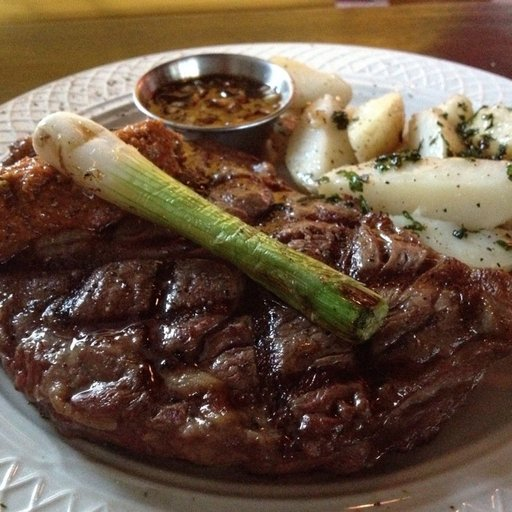

In [111]:
img_as_array

### 3. Transforming Data

In [112]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [113]:
# Preprocessing
data_transform = transforms.Compose([ # Like ImageDataGenerator
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor() # convert image into tensor
])

In [114]:
data_transform(img).shape # CHW

torch.Size([3, 64, 64])

In [115]:
data_transform(img).dtype

torch.float32

In [116]:
def plot_transformed_images(image_paths, transforms, n=3, seed = 42):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\n Size : {f.size}")
            ax[0].axis("off")

            # Transform image
            transformed_image = transforms(f).permute(1,2,0) # CHW -> HWC
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\n Shape : {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class : {image_path.parent.stem}", fontsize = 20)

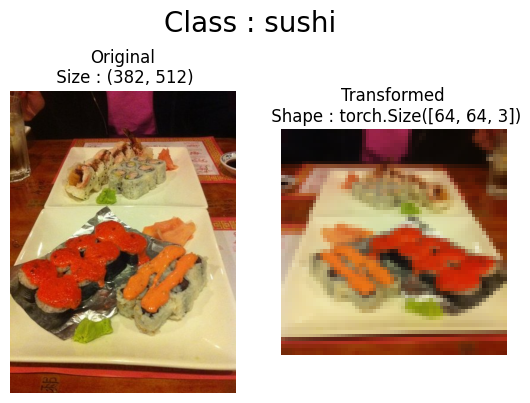

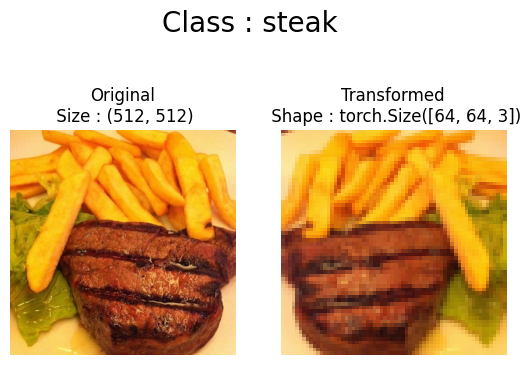

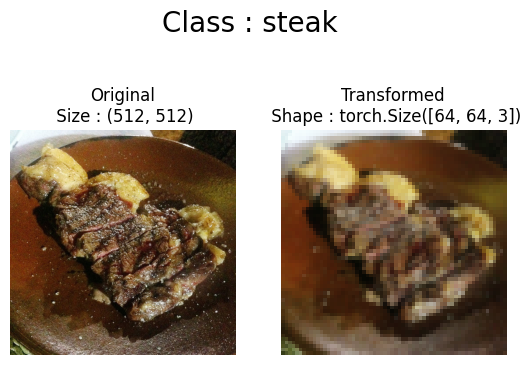

In [117]:
plot_transformed_images(image_paths = image_path_list,
                        transforms = data_transform)

## Loading image data using ImageFolder (option 1)

In [118]:
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform,
                                 target_transform = None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: /content/data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: /content/data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [119]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [120]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [121]:
len(train_data), len(test_data)

(225, 75)

In [122]:
train_data.samples[0]

('/content/data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [123]:
img, label = train_data[0][0], train_data[0][1]
img.shape, label, img.dtype

(torch.Size([3, 64, 64]), 0, torch.float32)

(-0.5, 63.5, 63.5, -0.5)

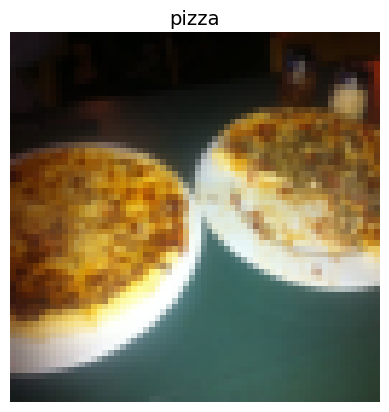

In [124]:
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label], fontsize = 14)
plt.axis(False)

## Turn loaded images into DataLoadersm

In [125]:
import os
os.cpu_count()

2

In [126]:
from torch.utils.data import DataLoader

train_ds = DataLoader(dataset = train_data,
                      batch_size = 1,
                      num_workers = os.cpu_count(),
                      shuffle = True)

test_ds = DataLoader(dataset = test_data,
                     batch_size = 1,
                     num_workers = os.cpu_count(),
                     shuffle = False)

len(train_ds), len(test_ds)

(225, 75)

In [127]:
img, label = next(iter(train_ds))
img.shape, label # batch_size, color channels, height, width

(torch.Size([1, 3, 64, 64]), tensor([0]))

## Model 0

In [129]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [130]:
# Load and transform data
from torchvision import datasets

train_data_sample = datasets.ImageFolder(root = train_dir,
                                         transform = simple_transform)

test_data_sample = datasets.ImageFolder(root = test_dir,
                                        transform = simple_transform)

len(train_data_sample), len(test_data_sample)

(225, 75)

In [132]:
# Turn dataset into dataloader
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_sample = DataLoader(dataset = train_data_sample,
                                     batch_size = BATCH_SIZE,
                                     shuffle = True,
                                     num_workers = NUM_WORKERS)

test_dataloader_sample = DataLoader(dataset = test_data_sample,
                                    batch_size = BATCH_SIZE,
                                    shuffle = False,
                                    num_workers = NUM_WORKERS)

len(train_dataloader_sample), len(test_dataloader_sample)

(8, 3)

In [165]:
# TinyVGG
import torch
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self,
                 input_shape : int,
                 hidden_units : int,
                 output_shape : int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      padding = 0,
                      stride = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2)
        )


        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 13 * 13,
                      out_features = output_shape)
        )


    def forward(self, x : torch.Tensor):
        z = self.conv_block_1(x)
        #print(z.shape)
        z = self.conv_block_2(z)
        #print(z.shape)
        z = self.classifier(z)
        return z


In [166]:
torch.manual_seed(42)

model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [167]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_sample))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [168]:
model_0(image_batch)

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

#### Torchinfo

In [157]:
!pip install torchinfo

In [171]:
from torchinfo import summary
summary(model_0, input_size = [1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

 * train_step()
 * test_step()

In [178]:
import tqdm
from tqdm.auto import tqdm
# Create train_step()

def train_step(model : nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               device : torch.device):

    model.train() # Train mode

    train_loss, train_acc = 0, 0

    for batch, (x_train,y_train) in enumerate(tqdm(dataloader)):

        # 1. Forward pass
        x_train, y_train = x_train.to(device), y_train.to(device)

        y_pred = model(x_train) # logits

        # 2. loss
        loss = loss_fn(y_pred, y_train)
        train_loss += loss.item()

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()


        # Calculate accuracy
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim =  1)
        train_acc += (y_pred_class == y_train).sum().item() / len(y_train)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss, train_acc


In [184]:
# Create test_step()

def test_step(model : nn.Module,
              dataloader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              device : torch.device):

    model.eval() # Eval mode
    with torch.inference_mode():
        test_loss, test_acc = 0, 0

        for x_test, y_test in dataloader:
            x_test, y_test = x_test.to(device), y_test.to(device)

            # 1. forward pass
            test_pred = model(x_test)

            # 2. loss
            loss = loss_fn(test_pred, y_test)
            test_loss += loss.item()

            # 3. Calculate accuracy
            test_pred_class = torch.argmax(torch.softmax(test_pred, dim = 1), dim = 1)
            test_acc += (test_pred_class == y_test).sum().item() / len(y_test)

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)

    return test_loss, test_acc


In [192]:
def train(model : torch.nn.Module,
          train_dataloader : torch.utils.data.DataLoader,
          test_dataloader : torch.utils.data.DataLoader,
          optimizer : torch.optim.Optimizer,
          loss_fn : torch.nn.Module,
          epochs : int = 5,
          device = device):

    results = {
        "train_loss" : [],
        "train_acc" : [],
        "test_loss" : [],
        "test_acc" : []
    }


    for epoch in tqdm(range(epochs)):
        print(f"Epoch : {epoch}\n---------")
        train_loss, train_acc = train_step(model = model,
                                           dataloader = train_dataloader,
                                           loss_fn = loss_fn,
                                           optimizer = optimizer,
                                           device = device)

        test_loss, test_acc = test_step(model = model,
                                        dataloader = test_dataloader,
                                        loss_fn = loss_fn,
                                        device = device)

        print(f"Train Loss : {train_loss:.4f} | Train Acc : {train_acc:.4f} | Test Loss : {test_loss:.4f} | Test Acc : {test_acc:.4f}")

        # Update results dictionay
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results


### Train and evaluate model 0

In [193]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(train_data.classes)).to(device)

# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001)


# Timer
from timeit import default_timer as timer
start_time = timer()

# Train Model 0
history_0 = train(model = model_0,
                  train_dataloader = train_dataloader_sample,
                  test_dataloader = test_dataloader_sample,
                  optimizer = optimizer,
                  loss_fn = loss_fn,
                  epochs = NUM_EPOCHS)

end_time = timer()
print(f"Total training time : {end_time - start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0
---------


  0%|          | 0/8 [00:00<?, ?it/s]

Train Loss : 1.1126 | Train Acc : 0.2344 | Test Loss : 1.1027 | Test Acc : 0.1979
Epoch : 1
---------


  0%|          | 0/8 [00:00<?, ?it/s]

Train Loss : 1.1107 | Train Acc : 0.3438 | Test Loss : 1.1254 | Test Acc : 0.2604
Epoch : 2
---------


  0%|          | 0/8 [00:00<?, ?it/s]

Train Loss : 1.0992 | Train Acc : 0.3047 | Test Loss : 1.0934 | Test Acc : 0.2604
Epoch : 3
---------


  0%|          | 0/8 [00:00<?, ?it/s]

Train Loss : 1.0908 | Train Acc : 0.3047 | Test Loss : 1.0791 | Test Acc : 0.2708
Epoch : 4
---------


  0%|          | 0/8 [00:00<?, ?it/s]

Train Loss : 1.0843 | Train Acc : 0.4258 | Test Loss : 1.0651 | Test Acc : 0.5938
Total training time : 14.932 seconds


In [195]:

history_0

{'train_loss': [1.1125575453042984,
  1.1106858998537064,
  1.0991553962230682,
  1.090822473168373,
  1.0842729061841965],
 'train_acc': [0.234375, 0.34375, 0.3046875, 0.3046875, 0.42578125],
 'test_loss': [1.102724273999532,
  1.1253942648569744,
  1.093361218770345,
  1.0791391531626384,
  1.065133810043335],
 'test_acc': [0.19791666666666666,
  0.2604166666666667,
  0.2604166666666667,
  0.2708333333333333,
  0.59375]}

--2024-07-30 17:18:48--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2024-07-30 17:18:48 (62.4 MB/s) - ‘helper_functions.py’ saved [10160/10160]



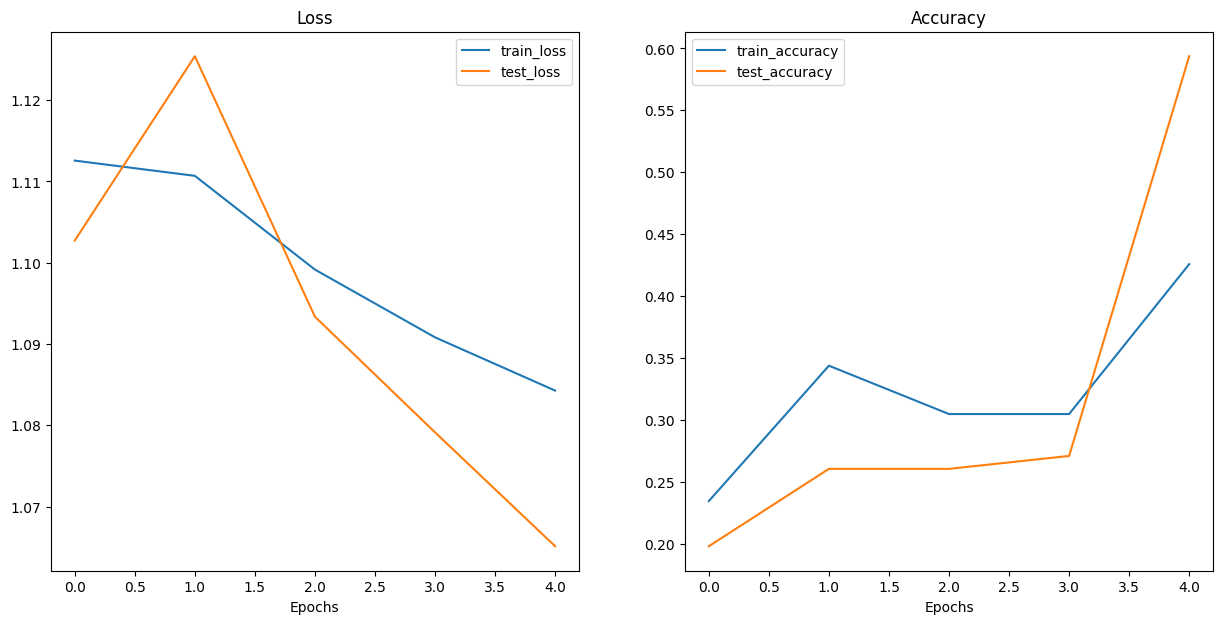

In [198]:
# plot history_0
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
from helper_functions import plot_loss_curves
plot_loss_curves(history_0)

### Model 1 with Data Augmentation

In [199]:
train_transform_trivial = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [201]:
train_ds_aug = datasets.ImageFolder(root = train_dir,
                                    transform = train_transform_trivial)

test_ds_aug = datasets.ImageFolder(root = test_dir,
                                   transform = test_transform_simple)

In [202]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_aug = DataLoader(dataset = train_ds_aug,
                                  batch_size = BATCH_SIZE,
                                  shuffle = True,
                                  num_workers = NUM_WORKERS)

torch.manual_seed(42)
test_dataloader_aug = DataLoader(dataset = test_ds_aug,
                                 batch_size = BATCH_SIZE,
                                 shuffle = False,
                                 num_workers = NUM_WORKERS)

In [203]:
len(train_dataloader_aug), len(test_dataloader_aug)

(8, 3)

## Training

In [204]:
torch.manual_seed(42)

model_1 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(train_data.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [214]:
 torch.manual_seed(42)
 torch.cuda.manual_seed(42)

 loss_fn = nn.CrossEntropyLoss()
 optimizer = torch.optim.Adam(params = model_1.parameters(),
                              lr = 0.001)

 NUM_EPOCHS = 5

start_time = timer()
history_1 = train(model = model_1,
                  train_dataloader = train_dataloader_aug,
                  test_dataloader = test_dataloader_aug,
                  optimizer = optimizer,
                  loss_fn = loss_fn,
                  epochs = NUM_EPOCHS,
                  device = device)

end_time = timer()
print(f"Total training time : {end_time - start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0
---------


  0%|          | 0/8 [00:00<?, ?it/s]

Train Loss : 0.7984 | Train Acc : 0.6484 | Test Loss : 1.0652 | Test Acc : 0.4129
Epoch : 1
---------


  0%|          | 0/8 [00:00<?, ?it/s]

Train Loss : 0.8108 | Train Acc : 0.6406 | Test Loss : 1.0365 | Test Acc : 0.4337
Epoch : 2
---------


  0%|          | 0/8 [00:00<?, ?it/s]

Train Loss : 0.8038 | Train Acc : 0.6836 | Test Loss : 1.0367 | Test Acc : 0.4233
Epoch : 3
---------


  0%|          | 0/8 [00:00<?, ?it/s]

Train Loss : 0.8130 | Train Acc : 0.6211 | Test Loss : 0.9893 | Test Acc : 0.4744
Epoch : 4
---------


  0%|          | 0/8 [00:00<?, ?it/s]

Train Loss : 0.9987 | Train Acc : 0.5312 | Test Loss : 0.9772 | Test Acc : 0.4545
Total training time : 16.784 seconds


In [215]:
history_1

{'train_loss': [0.7983573079109192,
  0.8107705190777779,
  0.8037528935819864,
  0.8130288422107697,
  0.9986998364329338],
 'train_acc': [0.6484375, 0.640625, 0.68359375, 0.62109375, 0.53125],
 'test_loss': [1.0651666124661763,
  1.0365314086278279,
  1.036731481552124,
  0.9892956217130026,
  0.9772089719772339],
 'test_acc': [0.4128787878787879,
  0.43371212121212127,
  0.4232954545454546,
  0.4744318181818182,
  0.4545454545454546]}

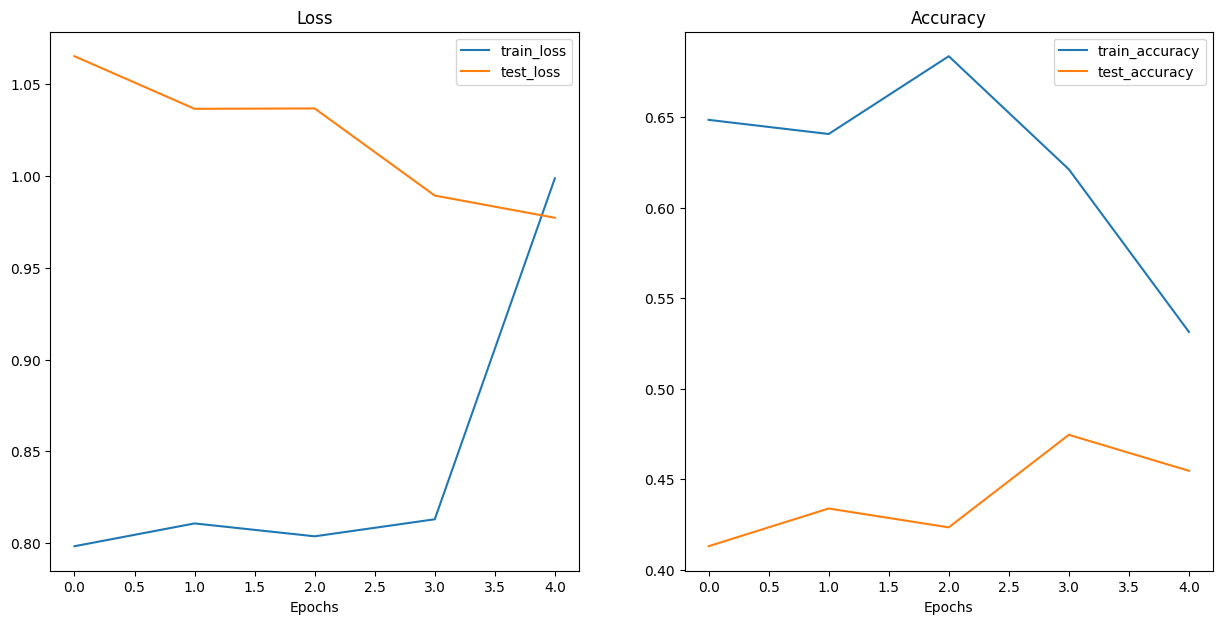

In [216]:
# plot
plot_loss_curves(history_1)

In [249]:
import torchvision

custom_image = torchvision.io.read_image("/content/dad_pizza.jpg").type(torch.float32)
custom_image.dtype

torch.float32

(-0.5, 499.5, 499.5, -0.5)

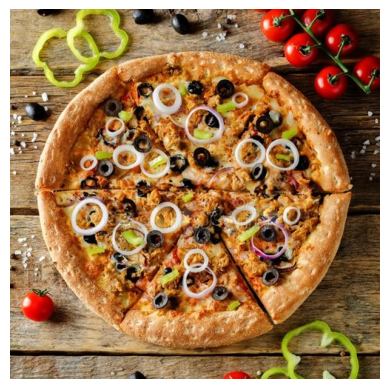

In [250]:
plt.imshow(custom_image.permute(1,2,0).type(torch.uint8))
plt.axis("off")

In [251]:
custom_image.shape

torch.Size([3, 500, 500])

In [259]:
transform_image = transforms.Compose([
    transforms.Resize(size = (64,64)),
])

transformed_images = transform_image(custom_image)
transformed_images.shape, transformed_images.unsqueeze(dim = 0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [261]:
model_1.eval()
with torch.inference_mode():
    model_1_pred = model_1(transformed_images.unsqueeze(dim = 0).to(device)) # add batch
model_1_pred # logits

tensor([[  87.1254, -239.5668,  -93.7261]])

In [263]:
image_pred_prob = torch.softmax(model_1_pred, dim = 1) # probabilities
image_pred_prob

tensor([[1., 0., 0.]])

In [265]:
custom_image_pred_label = torch.argmax(image_pred_prob, dim = 1)
custom_image_pred_label

tensor([0])

In [266]:
class_names[custom_image_pred_label]

'pizza'

In [272]:
from typing import List

def pred_and_plot_image(model : torch.nn.Module,
                        image_path : str,
                        class_names : List[str] = None,
                        transform = None,
                        device = device):
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    target_image = target_image / 255.

    if transform:
        target_image = transform(target_image)

    model.to(device)

    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(0)

        target_image_pred = model(target_image.to(device))

    target_image_pred_prob = torch.softmax(target_image_pred, dim = 1)
    target_image_pred_label = torch.argmax(target_image_pred_prob, dim = 1)

    plt.imshow(target_image.squeeze(0).permute(1,2,0))

    if class_names :
        title = f"Pred : {class_names[target_image_pred_label.cpu()]} | Prob : {target_image_pred_prob.max():.3f}"
        plt.title(title)
    else:
        title = f"Pred : {target_image_pred_label} | Prob : {target_image_pred_prob.max():.3f}"
        plt.title(title)

    plt.axis("off")





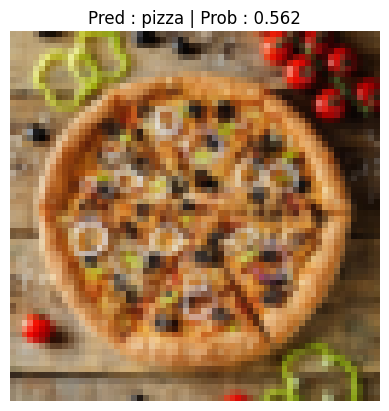

In [273]:
pred_and_plot_image(model = model_1,
                    image_path = "/content/dad_pizza.jpg",
                    class_names = class_names,
                    transform = transform_image)